In [1]:
from Superior import Superior
from Reality import Reality
from Individual import Individual
import matplotlib.pyplot as plt
import numpy as np
import time

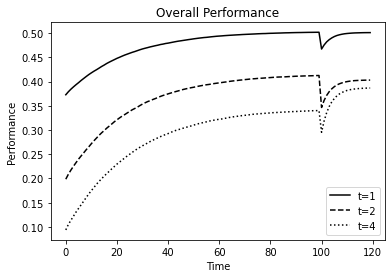

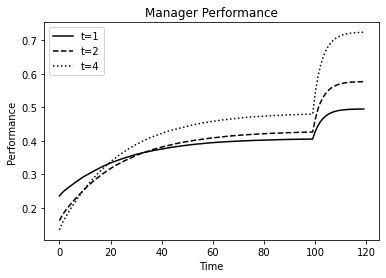

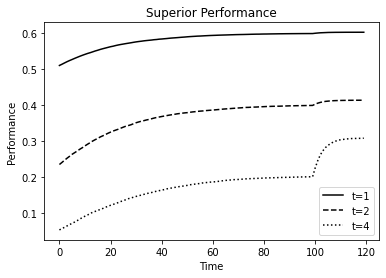

Time spent:  293.77669286727905


In [5]:
# Comparison between Overall Payoff, Policy Payoff, and Belief Payoff
m = 24
s = 3
t_list = [1, 2, 4]
n = 100
alpha = 0.5
overall_across_para = []
manager_across_para = []
superior_across_para = []
version = "Rushed"
t0 = time.time()
for t in t_list:
    overall_payoff_across_repeat = []
    manager_payoff_across_repeat = []
    superior_payoff_across_repeat = []
    for _ in range(100):
        reality = Reality(m=m, s=s, t=t, alpha=alpha)
        superior = Superior(m=m, s=s, t=t, n=n, reality=reality)
        superior.policy = []  # remove the policy
        overall_payoff_across_time = []
        manager_payoff_across_time = []
        superior_payoff_across_time = []
        for _ in range(100):
            for individual in superior.individuals:
                individual.free_local_search(version=version)
            overall_performance = [alpha * individual.payoff + (1-alpha) * individual.policy_payoff for individual in superior.individuals]
            manager_performance = [individual.payoff for individual in superior.individuals]
            policy_performance = [individual.policy_payoff for individual in superior.individuals]
            overall_payoff_across_time.append(sum(overall_performance) / len(overall_performance))
            manager_payoff_across_time.append(sum(manager_performance) / len(manager_performance))
            superior_payoff_across_time.append(sum(policy_performance) / len(policy_performance))

        for index in range(int(m/s)):
            for individual in superior.individuals:
                individual.policy = []  # reset the policy dummy
                for i in range(m // s):
                    temp = sum(individual.belief[index] for index in range(i * s, (i + 1) *s))
                    if temp < 0:
                        individual.policy.append(-1)
                    else:
                        individual.policy.append(1)
            temp = sum([individual.policy[index] for individual in superior.individuals])
            if temp > 0:
                superior.policy.append(1)  # fake superior as the consensus
            elif temp == 0:
                superior.policy.append(0)
            else:
                superior.policy.append(-1)
        for _ in range(20):  # we don't need loop here.
            for index, value in enumerate(superior.policy):
                for individual in superior.individuals:
                    individual.constrained_local_search(focal_policy=value, focal_policy_index=index, version=version)
            overall_performance = [alpha * individual.payoff + (1-alpha) * superior.payoff for individual in superior.individuals]
            manager_performance = [individual.payoff for individual in superior.individuals]
            policy_performance = [individual.policy_payoff for individual in superior.individuals]
            overall_payoff_across_time.append(sum(overall_performance) / len(overall_performance))
            manager_payoff_across_time.append(sum(manager_performance) / len(manager_performance))
            superior_payoff_across_time.append(sum(policy_performance) / len(policy_performance))
        overall_payoff_across_repeat.append(overall_payoff_across_time)
        manager_payoff_across_repeat.append(manager_payoff_across_time)
        superior_payoff_across_repeat.append(superior_payoff_across_time)
    result_0 = []
    for index in range(len(overall_payoff_across_repeat[0])):
        temp = [payoff_list[index] for payoff_list in overall_payoff_across_repeat]
        result_0.append(sum(temp) / len(temp))
    overall_across_para.append(result_0)
    result_1 = []
    for index in range(len(manager_payoff_across_repeat[0])):
        temp = [payoff_list[index] for payoff_list in manager_payoff_across_repeat]
        result_1.append(sum(temp) / len(temp))
    manager_across_para.append(result_1)
    result_2 = []
    for index in range(len(superior_payoff_across_repeat[0])):
        temp = [payoff_list[index] for payoff_list in superior_payoff_across_repeat]
        result_2.append(sum(temp) / len(temp))
    superior_across_para.append(result_2)


x = range(120)
plt.plot(x, overall_across_para[0], "k-", label="t=1")
plt.plot(x, overall_across_para[1], "k--", label="t=2")
plt.plot(x, overall_across_para[2], "k:", label="t=4")
# plt.savefig("search.jpg")
plt.title('Overall Performance')
plt.xlabel('Time')
plt.ylabel('Performance')
plt.legend()
plt.show()

# Only managers
x = range(120)
plt.plot(x, manager_across_para[0], "k-", label="t=1")
plt.plot(x, manager_across_para[1], "k--", label="t=2")
plt.plot(x, manager_across_para[2], "k:", label="t=4")
# plt.savefig("search.jpg")
plt.title('Manager Performance')
plt.xlabel('Time')
plt.ylabel('Performance')
plt.legend()
plt.show()

# Only superior
# Only managers
x = range(120)
plt.plot(x, superior_across_para[0], "k-", label="t=1")
plt.plot(x, superior_across_para[1], "k--", label="t=2")
plt.plot(x, superior_across_para[2], "k:", label="t=4")
# plt.savefig("search.jpg")
plt.title('Superior Performance')
plt.xlabel('Time')
plt.ylabel('Performance')
plt.legend()
plt.show()
t1 = time.time()
print("Time spent: ", t1-t0)

In [ ]:
# Comparison between Overall Payoff, Policy Payoff, and Belief Payoff
m = 30
s_list = [1, 3, 5]
t = 2
n = 100
alpha = 0.5
overall_across_para = []
manager_across_para = []
superior_across_para = []
version = "Rushed"
t0 = time.time()
for s in s_list:
    overall_payoff_across_repeat = []
    manager_payoff_across_repeat = []
    superior_payoff_across_repeat = []
    for _ in range(100):
        reality = Reality(m=m, s=s, t=t, alpha=alpha)
        superior = Superior(m=m, s=s, t=t, n=n, reality=reality)
        superior.policy = []  # remove the policy
        overall_payoff_across_time = []
        manager_payoff_across_time = []
        superior_payoff_across_time = []
        for _ in range(100):
            for individual in superior.individuals:
                individual.free_local_search(version=version)
            overall_performance = [alpha * individual.payoff + (1-alpha) * individual.policy_payoff for individual in superior.individuals]
            manager_performance = [individual.payoff for individual in superior.individuals]
            policy_performance = [individual.policy_payoff for individual in superior.individuals]
            overall_payoff_across_time.append(sum(overall_performance) / len(overall_performance))
            manager_payoff_across_time.append(sum(manager_performance) / len(manager_performance))
            superior_payoff_across_time.append(sum(policy_performance) / len(policy_performance))

        for index in range(int(m/s)):
            for individual in superior.individuals:
                individual.policy = []  # reset the policy dummy
                for i in range(m // s):
                    temp = sum(individual.belief[index] for index in range(i * s, (i + 1) *s))
                    if temp < 0:
                        individual.policy.append(-1)
                    else:
                        individual.policy.append(1)
            temp = sum([individual.policy[index] for individual in superior.individuals])
            if temp > 0:
                superior.policy.append(1)  # fake superior as the consensus
            elif temp == 0:
                superior.policy.append(0)
            else:
                superior.policy.append(-1)
        for _ in range(20):  # we don't need loop here.
            for index, value in enumerate(superior.policy):
                for individual in superior.individuals:
                    individual.constrained_local_search(focal_policy=value, focal_policy_index=index, version=version)
            overall_performance = [alpha * individual.payoff + (1-alpha) * superior.payoff for individual in superior.individuals]
            manager_performance = [individual.payoff for individual in superior.individuals]
            policy_performance = [individual.policy_payoff for individual in superior.individuals]
            overall_payoff_across_time.append(sum(overall_performance) / len(overall_performance))
            manager_payoff_across_time.append(sum(manager_performance) / len(manager_performance))
            superior_payoff_across_time.append(sum(policy_performance) / len(policy_performance))
        overall_payoff_across_repeat.append(overall_payoff_across_time)
        manager_payoff_across_repeat.append(manager_payoff_across_time)
        superior_payoff_across_repeat.append(superior_payoff_across_time)
    result_0 = []
    for index in range(len(overall_payoff_across_repeat[0])):
        temp = [payoff_list[index] for payoff_list in overall_payoff_across_repeat]
        result_0.append(sum(temp) / len(temp))
    overall_across_para.append(result_0)
    result_1 = []
    for index in range(len(manager_payoff_across_repeat[0])):
        temp = [payoff_list[index] for payoff_list in manager_payoff_across_repeat]
        result_1.append(sum(temp) / len(temp))
    manager_across_para.append(result_1)
    result_2 = []
    for index in range(len(superior_payoff_across_repeat[0])):
        temp = [payoff_list[index] for payoff_list in superior_payoff_across_repeat]
        result_2.append(sum(temp) / len(temp))
    superior_across_para.append(result_2)


x = range(120)
plt.plot(x, overall_across_para[0], "k-", label="t=1")
plt.plot(x, overall_across_para[1], "k--", label="t=2")
plt.plot(x, overall_across_para[2], "k:", label="t=4")
# plt.savefig("search.jpg")
plt.title('Overall Performance')
plt.xlabel('Time')
plt.ylabel('Performance')
plt.legend()
plt.show()

# Only managers
x = range(120)
plt.plot(x, manager_across_para[0], "k-", label="t=1")
plt.plot(x, manager_across_para[1], "k--", label="t=2")
plt.plot(x, manager_across_para[2], "k:", label="t=4")
# plt.savefig("search.jpg")
plt.title('Manager Performance')
plt.xlabel('Time')
plt.ylabel('Performance')
plt.legend()
plt.show()

# Only superior
# Only managers
x = range(120)
plt.plot(x, superior_across_para[0], "k-", label="t=1")
plt.plot(x, superior_across_para[1], "k--", label="t=2")
plt.plot(x, superior_across_para[2], "k:", label="t=4")
# plt.savefig("search.jpg")
plt.title('Superior Performance')
plt.xlabel('Time')
plt.ylabel('Performance')
plt.legend()
plt.show()
t1 = time.time()
print("Time spent: ", t1-t0)

In [ ]:
# Comparison between Overall Payoff, Policy Payoff, and Belief Payoff
m = 24
s = 3
t = 2
n = 100
alpha_list = [0.1, 0.5, 0.9]
overall_across_para = []
manager_across_para = []
superior_across_para = []
version = "Rushed"
t0 = time.time()
for alpha in alpha_list:
    overall_payoff_across_repeat = []
    manager_payoff_across_repeat = []
    superior_payoff_across_repeat = []
    for _ in range(500):
        reality = Reality(m=m, s=s, t=t, alpha=alpha)
        superior = Superior(m=m, s=s, t=t, n=n, reality=reality)
        superior.policy = []  # remove the policy
        overall_payoff_across_time = []
        manager_payoff_across_time = []
        superior_payoff_across_time = []
        for _ in range(100):
            for individual in superior.individuals:
                individual.free_local_search(version=version)
            overall_performance = [alpha * individual.payoff + (1-alpha) * individual.policy_payoff for individual in superior.individuals]
            manager_performance = [individual.payoff for individual in superior.individuals]
            policy_performance = [individual.policy_payoff for individual in superior.individuals]
            overall_payoff_across_time.append(sum(overall_performance) / len(overall_performance))
            manager_payoff_across_time.append(sum(manager_performance) / len(manager_performance))
            superior_payoff_across_time.append(sum(policy_performance) / len(policy_performance))

        for index in range(int(m/s)):
            for individual in superior.individuals:
                individual.policy = []  # reset the policy dummy
                for i in range(m // s):
                    temp = sum(individual.belief[index] for index in range(i * s, (i + 1) *s))
                    if temp < 0:
                        individual.policy.append(-1)
                    else:
                        individual.policy.append(1)
            temp = sum([individual.policy[index] for individual in superior.individuals])
            if temp > 0:
                superior.policy.append(1)  # fake superior as the consensus
            elif temp == 0:
                superior.policy.append(0)
            else:
                superior.policy.append(-1)
        for _ in range(20):  # we don't need loop here.
            for index, value in enumerate(superior.policy):
                for individual in superior.individuals:
                    individual.constrained_local_search(focal_policy=value, focal_policy_index=index, version=version)
            overall_performance = [alpha * individual.payoff + (1-alpha) * superior.payoff for individual in superior.individuals]
            manager_performance = [individual.payoff for individual in superior.individuals]
            policy_performance = [individual.policy_payoff for individual in superior.individuals]
            overall_payoff_across_time.append(sum(overall_performance) / len(overall_performance))
            manager_payoff_across_time.append(sum(manager_performance) / len(manager_performance))
            superior_payoff_across_time.append(sum(policy_performance) / len(policy_performance))
        overall_payoff_across_repeat.append(overall_payoff_across_time)
        manager_payoff_across_repeat.append(manager_payoff_across_time)
        superior_payoff_across_repeat.append(superior_payoff_across_time)
    result_0 = []
    for index in range(len(overall_payoff_across_repeat[0])):
        temp = [payoff_list[index] for payoff_list in overall_payoff_across_repeat]
        result_0.append(sum(temp) / len(temp))
    overall_across_para.append(result_0)
    result_1 = []
    for index in range(len(manager_payoff_across_repeat[0])):
        temp = [payoff_list[index] for payoff_list in manager_payoff_across_repeat]
        result_1.append(sum(temp) / len(temp))
    manager_across_para.append(result_1)
    result_2 = []
    for index in range(len(superior_payoff_across_repeat[0])):
        temp = [payoff_list[index] for payoff_list in superior_payoff_across_repeat]
        result_2.append(sum(temp) / len(temp))
    superior_across_para.append(result_2)


x = range(120)
plt.plot(x, overall_across_para[0], "k-", label="alpha=0.1")
plt.plot(x, overall_across_para[1], "k--", label="alpha=0.5")
plt.plot(x, overall_across_para[2], "k:", label="alpha=0.9")
# plt.savefig("search.jpg")
plt.title('Overall Performance')
plt.xlabel('Time')
plt.ylabel('Performance')
plt.legend()
plt.show()

# Only managers
x = range(120)
plt.plot(x, manager_across_para[0], "k-", label="alpha=0.1")
plt.plot(x, manager_across_para[1], "k--", label="alpha=0.5")
plt.plot(x, manager_across_para[2], "k:", label="alpha=0.9")
# plt.savefig("search.jpg")
plt.title('Manager Performance')
plt.xlabel('Time')
plt.ylabel('Performance')
plt.legend()
plt.show()

# Only superior
# Only managers
x = range(120)
plt.plot(x, superior_across_para[0], "k-", label="alpha=0.1")
plt.plot(x, superior_across_para[1], "k--", label="alpha=0.5")
plt.plot(x, superior_across_para[2], "k:", label="alpha=0.9")
# plt.savefig("search.jpg")
plt.title('Superior Performance')
plt.xlabel('Time')
plt.ylabel('Performance')
plt.legend()
plt.show()
t1 = time.time()
print("Time spent: ", t1-t0)

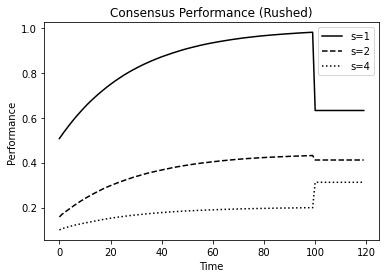

Time spent:  1170.4217228889465


In [6]:
# Consensus (Rushed)
# Manager and Superior only search on cognitive payoff (not real payoff)
# Performance is measured by the real payoff
m = 30
s_list = [1, 3, 5]
t = 2
n = 100
alpha = 0.5
results_across_t = []
version = "Rushed"
t0 = time.time()
for s in s_list:
    payoff_list_final = []
    for _ in range(100):
        reality = Reality(m=m, s=s, t=t, alpha=alpha)
        superior = Superior(m=m, s=s, t=t, n=n, reality=reality)
        superior.policy = []  # remove the policy
        payoff_list = []
        for _ in range(100):
            for individual in superior.individuals:
                individual.free_local_search(version=version)
            performance = [individual.payoff for individual in superior.individuals]
            payoff_list.append(sum(performance) / len(performance))
        payoff_list_final.append(payoff_list)

        for index in range(int(m/s)):
            for individual in superior.individuals:
                individual.policy = []  # reset the policy dummy
                for i in range(m // s):
                    temp = sum(individual.belief[index] for index in range(i * s, (i + 1) *s))
                    if temp < 0:
                        individual.policy.append(-1)
                    else:
                        individual.policy.append(1)
            temp = sum([individual.policy[index] for individual in superior.individuals])
            if temp > 0:
                superior.policy.append(1)  # fake superior as the consensus
            elif temp == 0:
                superior.policy.append(0)
            else:
                superior.policy.append(-1)
        for _ in range(20):
            for index, value in enumerate(superior.policy):
                for individual in superior.individuals:
                    individual.constrained_local_search(focal_policy=value, focal_policy_index=index, version=version)
            performance = [alpha * individual.payoff + (1-alpha) * superior.payoff for individual in superior.individuals]
            payoff_list.append(sum(performance) / len(performance))
        payoff_list_final.append(payoff_list)
    result = []
    for index in range(120):
        temp = [payoff_list[index] for payoff_list in payoff_list_final]
        result.append(sum(temp) / len(temp))
    results_across_t.append(result)

x = range(120)
plt.plot(x, results_across_t[0], "k-", label="s=1")
plt.plot(x, results_across_t[1], "k--", label="s=2")
plt.plot(x, results_across_t[2], "k:", label="s=4")
# plt.savefig("search.jpg")
plt.title('Consensus Performance (Rushed)')
plt.xlabel('Time')
plt.ylabel('Performance')
plt.legend()
plt.show()
t1 = time.time()
print("Time spent: ", t1-t0)

In [ ]:
# Is alpha necessary?
# Compare the lower-level performance and upper-level performance
# Consensus (Rushed)
# Manager and Superior only search on cognitive payoff (not real payoff)
# Performance is measured by the real payoff
m = 30
s_list = [1, 3, 5]
t = 2
n = 100
alpha = 0.5
results_across_t = []
version = "Rushed"
t0 = time.time()
for s in s_list:
    payoff_list_final = []
    for _ in range(100):
        reality = Reality(m=m, s=s, t=t, alpha=alpha)
        superior = Superior(m=m, s=s, t=t, n=n, reality=reality)
        superior.policy = []  # remove the policy
        manager_payoff_list = []
        superior_payoff_list = []
        for _ in range(100):
            for individual in superior.individuals:
                individual.free_local_search(version=version)
            performance = [individual.payoff for individual in superior.individuals]
            manager_payoff_list.append(sum(performance) / len(performance))
        payoff_list_final.append(manager_payoff_list)

        for index in range(int(m/s)):
            for individual in superior.individuals:
                individual.policy = []  # reset the policy dummy
                for i in range(m // s):
                    temp = sum(individual.belief[index] for index in range(i * s, (i + 1) *s))
                    if temp < 0:
                        individual.policy.append(-1)
                    else:
                        individual.policy.append(1)
            temp = sum([individual.policy[index] for individual in superior.individuals])
            if temp > 0:
                superior.policy.append(1)  # fake superior as the consensus
            elif temp == 0:
                superior.policy.append(0)
            else:
                superior.policy.append(-1)
        for _ in range(20):
            for index, value in enumerate(superior.policy):
                for individual in superior.individuals:
                    individual.constrained_local_search(focal_policy=value, focal_policy_index=index, version=version)
            manager_performance = [individual.payoff for individual in superior.individuals]
            manager_payoff_list.append(sum(manager_performance) / len(manager_performance))
        payoff_list_final.append(manager_payoff_list)
    result = []
    for index in range(120):
        temp = [payoff_list[index] for payoff_list in payoff_list_final]
        result.append(sum(temp) / len(temp))
    results_across_t.append(result)

x = range(120)
plt.plot(x, results_across_t[0], "k-", label="Manager")
plt.plot(x, results_across_t[1], "k--", label="Superior")
# plt.savefig("search.jpg")
plt.title('Consensus Performance (Rushed)')
plt.xlabel('Time')
plt.ylabel('Performance')
plt.legend()
plt.show()
t1 = time.time()
print("Time spent: ", t1-t0)

